# Americas Top Colleges to year 2019 by "Forbes" magazine
#### נעשה ע"י: יניב רצון, רביד עמרם, שירז חדד
#### מספר קבוצה: 18
##### קישור לקובץ: https://www.kaggle.com/chris95cam/forbes-americas-top-colleges-2019


1. [סידור הדאטה](#section1)

   1.1 [תיקון עמודות](#section1.1)   
   1.2 [ערכים חסרים](#section1.2)  
   1.3 [חריגות](#section1.3)    
   1.4 [הצגת הדאטה](#section1.4)
   
2. [תובנה 1](#section2)
3. [תובנה 2](#section3)
4. [תובנה 3](#section4)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<div>
<img src = "https://2u.com/static/84f4025b19c2bf44a1c9b049994c1eff/5044d/baker-library-harvard-university_OPxWuDn.max-2880x1800.jpg">
</div>

In [2]:
url = 'https://raw.githubusercontent.com/YRatzon/finel_project/main/ForbesAmericasTopColleges2019.csv'
coll_rank = pd.read_csv(url)
coll_rank

,Rank,Name,City,State,Public/Private,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Alumni Salary,Acceptance Rate,SAT Lower,SAT Upper,ACT Lower,ACT Upper,Website
0,1.0,Harvard University,Cambridge,MA,Private,13844.0,31120.0,14327.0,49870.0,69600.0,146800.0,5.0,1460.0,1590.0,32.0,35.0,www.harvard.edu
1,2.0,Stanford University,Stanford,CA,Private,8402.0,17534.0,13261.0,50134.0,69109.0,145200.0,5.0,1390.0,1540.0,32.0,35.0,www.stanford.edu
2,3.0,Yale University,New Haven,CT,Private,6483.0,12974.0,18627.0,50897.0,71290.0,138300.0,7.0,1460.0,1580.0,32.0,35.0,www.yale.edu
3,4.0,Massachusetts Institute of Technology,Cambridge,MA,Private,4680.0,11466.0,20771.0,43248.0,67430.0,155200.0,7.0,1490.0,1570.0,33.0,35.0,web.mit.edu
4,5.0,Princeton University,Princeton,NJ,Private,5659.0,8273.0,9327.0,48088.0,66150.0,139400.0,6.0,1430.0,1570.0,31.0,35.0,www.princeton.edu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,646.0,New Mexico State University,Las Cruces,NM,Public,13379.0,14432.0,8625.0,9582.0,34720.0,96700.0,64.0,910.0,1160.0,18.0,23.0,www.nmsu.edu
646,647.0,Indiana State University,Terre Haute,IN,Public,13626.0,13763.0,13012.0,9297.0,32938.0,85600.0,85.0,900.0,1110.0,17.0,23.0,www.indstate.edu
647,648.0,Emory &amp; Henry College,Emory,VA,Private,1094.0,1226.0,19340.0,27155.0,48100.0,70700.0,72.0,988.0,1170.0,19.0,25.0,www.ehc.edu
648,649.0,Wells College,Aurora,NY,Private,488.0,516.0,22828.0,30207.0,55180.0,NaN,80.0,NaN,NaN,NaN,NaN,www.wells.edu


<a id='section1'></a>
### 1. סידור הדאטה 

<a id='section1.1'></a>
#### 1.1 תיקון עמודות

In [3]:
coll_rank = coll_rank.copy(deep = True)
coll_rank.dtypes

Rank                        float64
Name                         object
City                         object
State                        object
Public/Private               object
Undergraduate Population    float64
Student Population          float64
Net Price                   float64
Average Grant Aid           float64
Total Annual Cost           float64
Alumni Salary               float64
Acceptance Rate             float64
SAT Lower                   float64
SAT Upper                   float64
ACT Lower                   float64
ACT Upper                   float64
Website                      object
dtype: object

אין בעיה עם סוג הערכים

<a id='section1.2'></a>
#### 1.2 ערכים חסרים


In [4]:
coll_rank.isnull().sum().sort_values(ascending=False)

SAT Upper                   99
SAT Lower                   99
ACT Lower                   97
ACT Upper                   97
Alumni Salary               15
Website                      5
Average Grant Aid            4
City                         3
Acceptance Rate              2
Net Price                    2
Total Annual Cost            0
Student Population           0
Undergraduate Population     0
Public/Private               0
State                        0
Name                         0
Rank                         0
dtype: int64

##### נבדוק איך למלא את שכר הבוגרים

<AxesSubplot:xlabel='Alumni Salary', ylabel='Rank'>

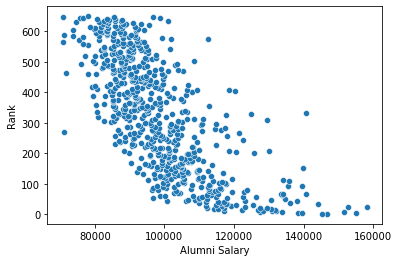

In [5]:
sns.scatterplot(data= coll_rank, x= 'Alumni Salary', y= 'Rank')

#### ניתן לראות שיש קשר בין דירוג האוניברסיטאות לבין שכר הבוגרים, לכן נמלא בערכים שצמודים אליהם

In [6]:
coll_rank['Alumni Salary'] = coll_rank[['Alumni Salary']].apply(lambda x: x.fillna(method='bfill'))

#### מאחר וכמות הערכים החסרים בעמודות שבהן נשתמש במהלך העבודה מועטה, בחרנו להוריד אותם

In [7]:
coll_rank = coll_rank.dropna(subset = ['Acceptance Rate','Average Grant Aid','Net Price'])

coll_rank.isnull().sum().sort_values(ascending=False)

SAT Upper                   97
SAT Lower                   97
ACT Lower                   94
ACT Upper                   94
Website                      5
City                         3
Undergraduate Population     0
Name                         0
State                        0
Public/Private               0
Average Grant Aid            0
Student Population           0
Net Price                    0
Total Annual Cost            0
Alumni Salary                0
Acceptance Rate              0
Rank                         0
dtype: int64

<a id='section1.3'></a>
#### 1.3 חריגות

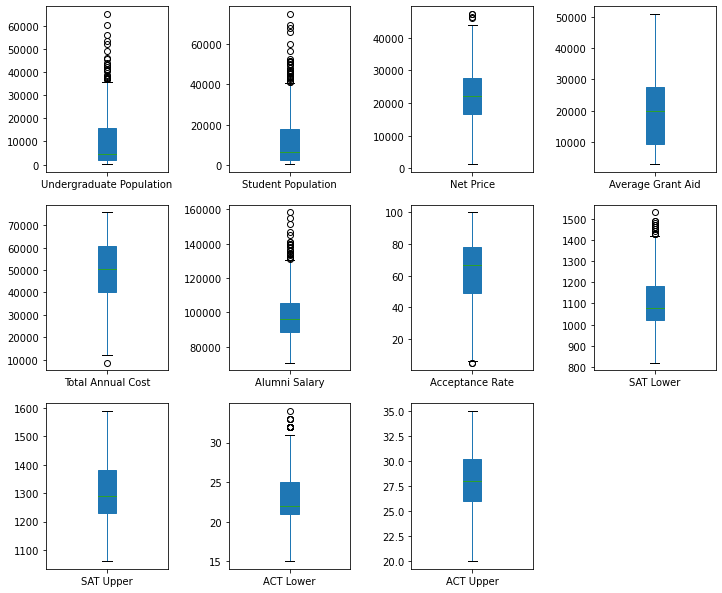

In [8]:
df_to_plot = coll_rank.drop(columns=['Rank', 'Name', 'State', 'City', 'Public/Private'])
df_to_plot = df_to_plot.select_dtypes(include=np.number)
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

##### ניתן להבחין בחריגה שנמצאת במחיר השנתי המלא. נמצא את האוניברסיטאות החריגות ונוריד אותן מן הדאטה.

In [9]:
coll_rank[coll_rank['Total Annual Cost'] < 100]

,Rank,Name,City,State,Public/Private,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Alumni Salary,Acceptance Rate,SAT Lower,SAT Upper,ACT Lower,ACT Upper,Website


In [10]:
coll_rank = coll_rank[coll_rank['Total Annual Cost'] > 100].reset_index(drop=True)

נבצע בדיקה

<AxesSubplot:>

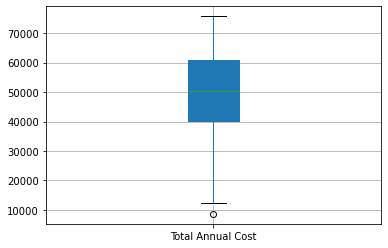

In [11]:
coll_rank.boxplot('Total Annual Cost', patch_artist=True)

<a id='section1.4'></a>
#### 1.4 הצגת הדאטה

##### כדי למצוא קורלציות השתמשנו בגרף הבא:

<AxesSubplot:>

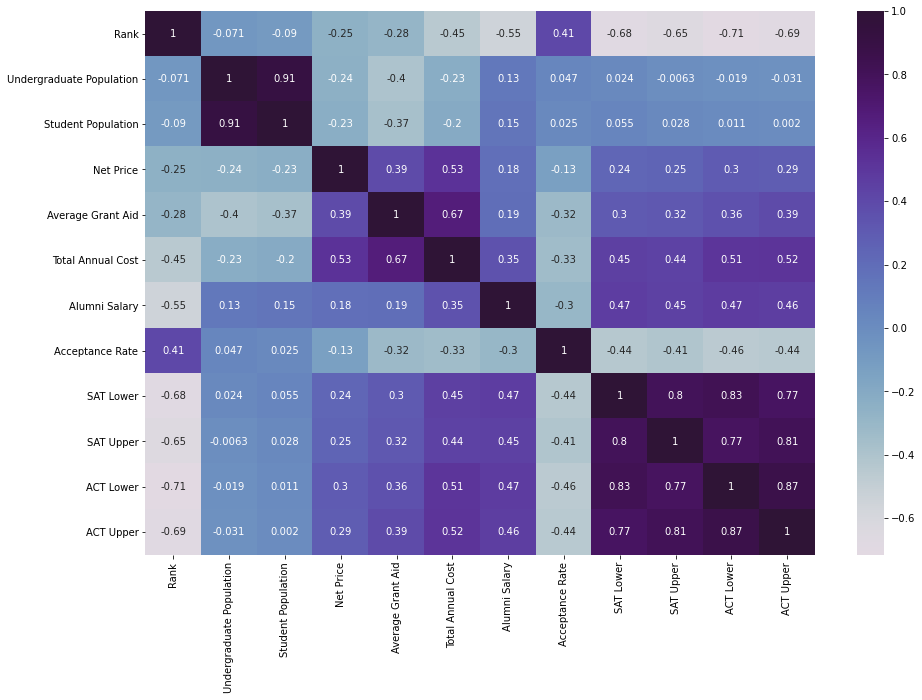

In [12]:
features = ['Rank', 'Name', 'City', 'State', 'Public/Private', 'Undergraduate Population', 'Student Population', 'Net Price', 'Average Grant Aid', 'Total Annual Cost' , 'Alumni Salary', 'Acceptance Rate','SAT Lower', 'SAT Upper', 'ACT Lower', 'ACT Upper']
coll_corr = coll_rank[features].corr(method = 'kendall')
plt.figure(figsize=(15,10))
sns.heatmap(data=coll_corr, cmap='twilight', center=1, annot = True)

##### להלן מחיר ממוצע שישלם סטודנט באוניברסיטה באר"הב שנחשבת בין 650 האוניברסיטאות הטובות ביותר 

In [13]:
coll_rank['Net Price'].mean()

22518.059190031152

##### נבדוק כמה אוניברסיטאות פרטיות לעומת ציבוריות יש

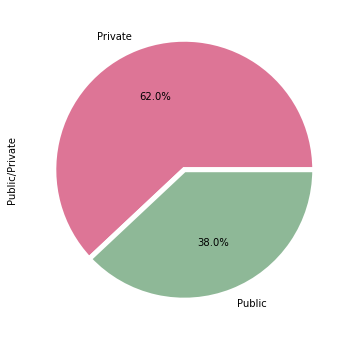

In [14]:
colors = ['#DD7596', '#8EB897']
plt.rcParams["figure.figsize"] = (20,6)
coll_rank['Public/Private'].value_counts().plot.pie(autopct='%1.1f%%', wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white' }, colors=colors);

---
<a id='section2'></a>
## תובנה מס' 1

##### ניסינו לראות מה הקשר בין אוכלוסיית הסטודנטים באוניברסיטה (מבחינת תארים), לבין דירוג האוניברסיטה

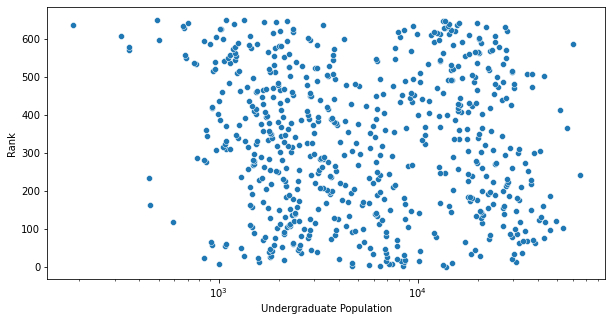

In [15]:
plt.figure(figsize=(10,5))
ax = sns.scatterplot(data= coll_rank, x= 'Undergraduate Population', y= 'Rank')
ax.set_xscale('log')

##### ניתן לראות שאין קשר בין אוכלוסיית הסטודנטים לתואר ראשון לבין הדירוג שלהן

##### המשכנו לחקור ובנינו עמודה חדשה של סטודנטים לתארים מתקדמים, עמודה למספר מועמדים ועמודות של אחוזי קבלה של סטודנטים לתואר ראשון וסטודנטים לתארים המתקדמים

In [16]:
coll_rank['Applicants'] = coll_rank['Student Population']//(coll_rank['Acceptance Rate']/100)
coll_rank['Graduate Population'] = coll_rank['Student Population']-coll_rank['Undergraduate Population']
coll_rank['Graduate Population acceptance percent'] = (coll_rank['Graduate Population']/coll_rank['Applicants'])*100
coll_rank['Undergraduate Population acceptance percent'] = (coll_rank['Undergraduate Population']/coll_rank['Applicants'])*100
coll_rank[['Applicants','Graduate Population','Undergraduate Population acceptance percent','Graduate Population acceptance percent']]

,Applicants,Graduate Population,Undergraduate Population acceptance percent,Graduate Population acceptance percent
0,622399.0,17276.0,2.224297,2.775711
1,350679.0,9132.0,2.395923,2.604091
2,185342.0,6491.0,3.497858,3.502174
3,163799.0,6786.0,2.857160,4.142882
4,137883.0,2614.0,4.104204,1.895810
...,...,...,...,...
637,22549.0,1053.0,59.333008,4.669830
638,16191.0,137.0,84.157865,0.846149
639,1702.0,132.0,64.277321,7.755582
640,644.0,28.0,75.776398,4.347826


#### עם הנתונים החדשים שחישבנו נוכל למצוא את הקשר בין הדירוג של האוניברסיטה לכמות הסטודנטים לתואר ראשון שמתקבלים אליה

<AxesSubplot:xlabel='Undergraduate Population acceptance percent', ylabel='Rank'>

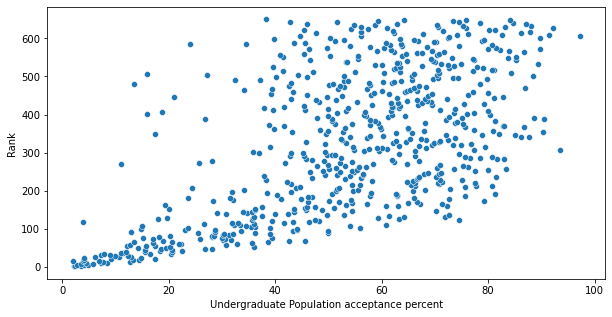

In [17]:
plt.rcParams["figure.figsize"] = (10,5)
sns.scatterplot(data= coll_rank, x='Undergraduate Population acceptance percent', y= 'Rank')

#### ניתן לראות שככל שהאוניברסיטה יותר נחשבת כך אחוזי הקבלה לתואר ראשון יותר נמוכים

---
<a id='section3'></a>
## תובנה מס' 2

#### בתובנה הזאת נרצה להציג את המדינה המפותחת ביותר בעניין ההשכלה

#### נבדוק כמה קולג'ים יש בכל מדינה

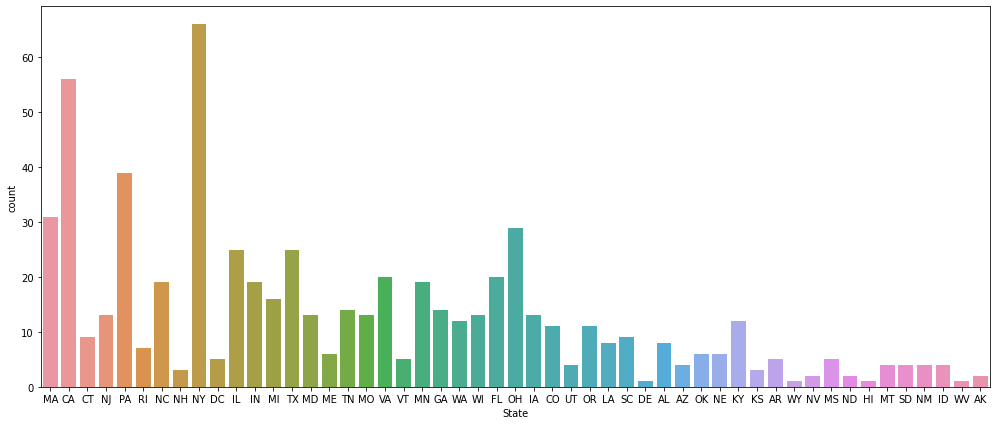

In [18]:
plt.figure(figsize = (17,7))
sns.countplot(data= coll_rank, x= 'State')
plt.show()

##### ניתן להבחין שהמדינה עם כמות האוניברסיטאות הגדולה ביותר היא קליפורניה וניו יורק

##### נרצה לבדוק האם קליפורניה וניו יורק הן גם האוניברסיטאות עם אחוזי סטודנטים יותר גבוהים

In [19]:
states= coll_rank.groupby('State')[['Student Population']].sum().sort_values('Student Population', ascending = False)
students=states.sum()
states['Pareto_of_population'] = ((coll_rank.groupby('State')[['Student Population']].sum()/students)*100)
states.head()

,Student Population,Pareto_of_population
State,,
CA,891593.0,11.506441
NY,611950.0,7.897512
TX,543634.0,7.015861
FL,412801.0,5.327397
OH,322880.0,4.166923


##### ניתן לראות ע"פ הטבלה שניו יורק וקליפורניה אכן מובילות בכמות הסטודנטים.
##### נרצה לראות כמה סטודנטים נמצאים בממוצע בכל אוניברסיטה עבור כל מדינה והאם גם בזה קליפורניה וניו יורק מובילות

In [20]:
coll_rank['num']=1
states['num_of_universities'] = coll_rank.groupby('State')[['num']].sum()
states['students_to_university']= states['Student Population']/ states['num_of_universities']
states[['students_to_university']].sort_values('students_to_university',ascending=False).reset_index().head(10)

,State,students_to_university
0,AZ,32157.250000
1,WV,28406.000000
2,ID,26662.500000
3,NV,26064.000000
4,UT,25240.250000
5,DE,23774.000000
6,KS,21831.666667
7,TX,21745.360000
8,FL,20640.050000
9,AK,17845.000000


##### ניתן לראות שאריזונה היא המדינה עם מס' הסטודנטים הגבוה ביותר לכל אוניברסיטה.

#### מדוע אריזונה נמצאת במקום הראשון מבחינת מספר סטודנטים לכל אוניברסיטה?

Text(0.5, 0, 'States')

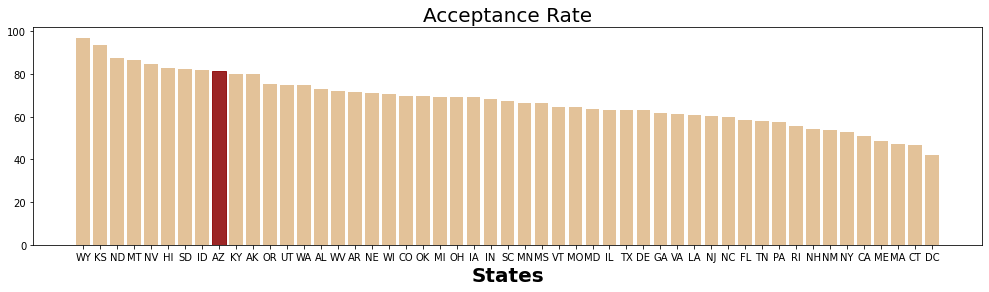

In [21]:
acceptance= coll_rank.groupby('State')[['Acceptance Rate']].mean().sort_values('Acceptance Rate', ascending= False).reset_index()
acceptance_Rate = acceptance['Acceptance Rate']
state = acceptance['State']
plt.figure(figsize = (17,4))
barplot = plt.bar(state, acceptance_Rate, color = 'burlywood', alpha = 0.85)
barplot[8].set_color('darkred')
plt.title('Acceptance Rate', size= "20")
plt.xlabel('States', fontsize = 20, weight = 'bold')

##### עפ"י הנתונים לעיל ניתן להבחין שאחוזי הקבלה הם יחסית גבוהים לשאר האוניברסיטאות בארה"ב, נמצא במקום התשיעי מתוך 51 מדינות

Text(0.5, 0, 'States')

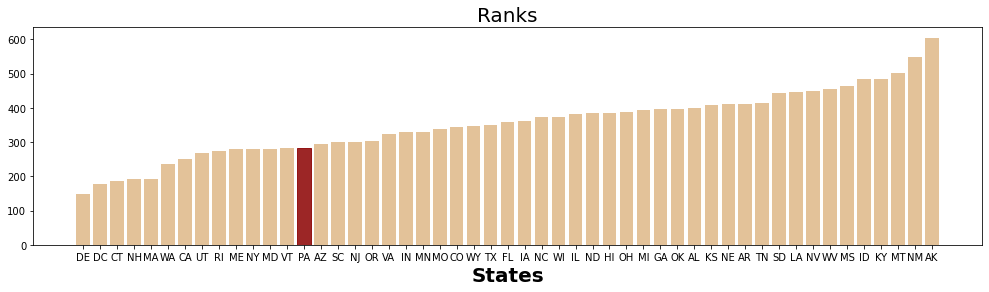

In [22]:
rate= coll_rank.groupby('State')[['Rank']].mean().sort_values('Rank').reset_index()
rank = rate['Rank']
state_az = rate['State']
plt.figure(figsize = (17,4))
barplot = plt.bar(state_az, rank, color = 'burlywood', alpha = 0.85)
barplot[13].set_color('darkred')
plt.title('Ranks', size= "20")
plt.xlabel('States', fontsize = 20, weight = 'bold')

##### 

##### 

##### הדירוג של אריזונה נמצא בדירוג מאוד גבוה יחסית לשאר המדינות בארה"ב, נמצא במקום ה14 מתוך 51 מדינות.

#### נוכל להבחין שאריזונה היא המדינה עם אוניברסיטאות שיותר קל להתקבל אליהן, אך עדיין הדירוג שלהן יחסית גבוה. ולכן אריזונה היא המדינה עם כמות הסטודנטים הגבוה ביותר על כל אוניברסיטה בארה"ב 

---
<a id='section4'></a>
## תובנה מס' 3

##### בתובנה הזאת בחרנו להתמקד בקשר בין הסיוע הכספי שסטודנט מקבל לשנת לימודים לבין הסכום שמשלם עבור שנת לימודים

<AxesSubplot:>

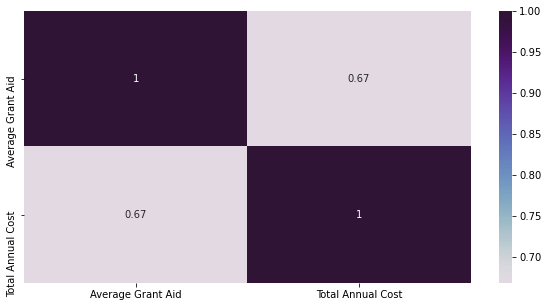

In [23]:
cost_aid = ['Average Grant Aid', 'Total Annual Cost']
cost_aid_corr = coll_rank[cost_aid].corr(method = 'kendall')
sns.heatmap(data=cost_aid_corr, cmap='twilight', center=1, annot = True)

##### ניתן לראות שקיימת קורלציה גבוהה וחיובית בין הסיוע הכספי לתשלום השנתי. ככל שהמחיר שסטודנט משלם עבור שנת לימודים גבוה יותר, כך גם הסיוע הכספי שמקבל גבוה יותר.

##### לכן, החלטנו לבחון זאת ע"י הוספת עמודה המצייגת את אחוז הסיוע הכספי מתוך הסכום הכולל שסטודנט משלם עבור שנת לימודים.

In [24]:
coll_rank['Aid Percentage']=coll_rank['Average Grant Aid']/(coll_rank['Total Annual Cost'])
coll_rank[['Name','Public/Private', 'Total Annual Cost', 'Average Grant Aid', 'Aid Percentage']]

,Name,Public/Private,Total Annual Cost,Average Grant Aid,Aid Percentage
0,Harvard University,Private,69600.0,49870.0,0.716523
1,Stanford University,Private,69109.0,50134.0,0.725434
2,Yale University,Private,71290.0,50897.0,0.713943
3,Massachusetts Institute of Technology,Private,67430.0,43248.0,0.641376
4,Princeton University,Private,66150.0,48088.0,0.726954
...,...,...,...,...,...
637,New Mexico State University,Public,34720.0,9582.0,0.275979
638,Indiana State University,Public,32938.0,9297.0,0.282258
639,Emory &amp; Henry College,Private,48100.0,27155.0,0.564553
640,Wells College,Private,55180.0,30207.0,0.547427


##### החלטנו להתמקד בהבדל בין אחוזי המימון של האוניברסיאות והקולג'ים הציבוריים לבין הפרטיים.

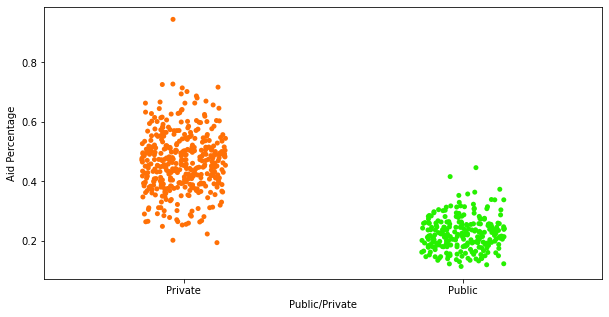

In [25]:
sns.stripplot(x='Public/Private', y= 'Aid Percentage',data=coll_rank, palette="gist_ncar_r", jitter = 0.15)
plt.show()

#### אנו שמים לב שאחוז הסיוע הכספי שסטודנטים אשר לומדים באוניברסיטאות פרטיות מקבלים גבוה משמעותית מאחוז הסיוע הכספי שמקבלים סטודנטים אשר לומדים באוניברסיטאות ציבוריות.

---

<div>
<img src = "http://s3.amazonaws.com/themorning-aruna/wp-content/uploads/2020/12/05151539/Photo-4-Pinterest.jpg" width= "1000">
</div>